## Finding best model and hyper parameter tunning using GridSearchCV
For iris flower dataset in sklearn library, we are going to find out best model and best hyper parameters using GridSearchCV.

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [114]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [115]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [116]:
target_names = list(iris.target_names)
target_names

['setosa', 'versicolor', 'virginica']

In [117]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


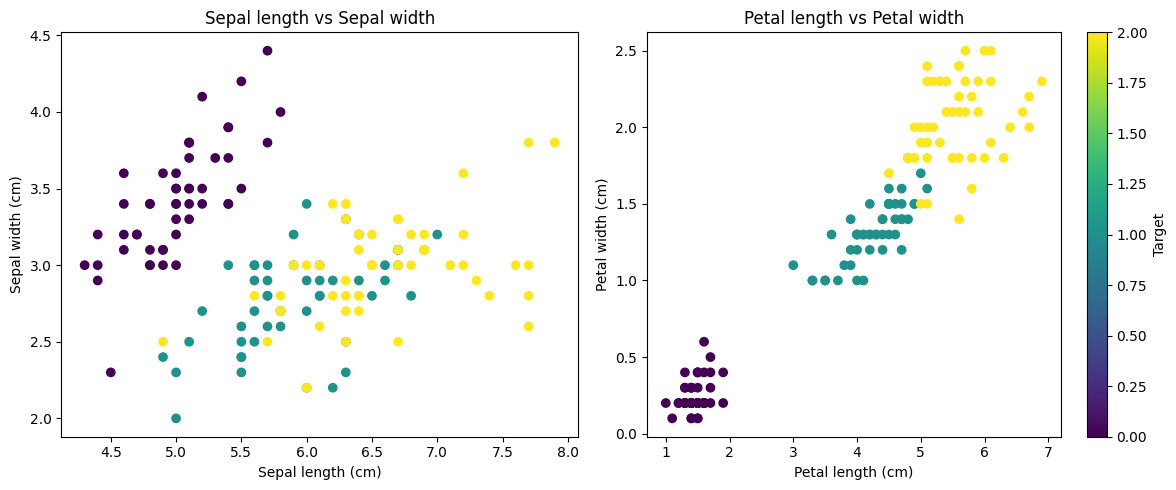

In [118]:
# Scatter plot for Sepal length vs Sepal width
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['target'], cmap='viridis')
plt.title('Sepal length vs Sepal width')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')

# Scatter plot for Petal length vs Petal width
plt.subplot(1, 2, 2)
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['target'], cmap='viridis')
plt.title('Petal length vs Petal width')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')

plt.colorbar(label='Target')
plt.tight_layout()
plt.show()

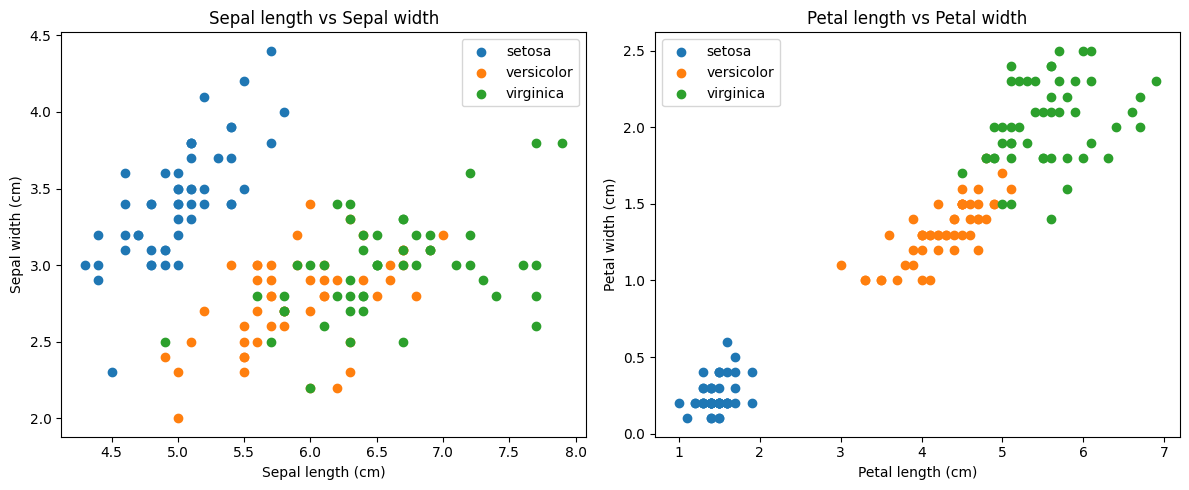

In [119]:
# Create a figure and a set of subplots
plt.figure(figsize=(12, 5))

# Scatter plot for Sepal length vs Sepal width
plt.subplot(1, 2, 1)
for target in range(len(target_names)):
    subset = df[df['target'] == target]
    plt.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'], label=target_names[target])
plt.title('Sepal length vs Sepal width')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend()

# Scatter plot for Petal length vs Petal width
plt.subplot(1, 2, 2)
for target in range(len(target_names)):
    subset = df[df['target'] == target]
    plt.scatter(subset['petal length (cm)'], subset['petal width (cm)'], label=target_names[target])
plt.title('Petal length vs Petal width')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.legend()

plt.tight_layout()
plt.show()

## Use train_test_split & manually tuning of parameters by trial and error

In [120]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)

In [121]:
model = SVC(kernel='rbf', C=30, gamma='auto')
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

## Use K Fold Cross validation

Manually try supplying models with different parameters to cross_val_score function with 5 fold cross validation.

In [122]:
cross_val_score(SVC(kernel='linear', C=10, gamma='auto'),iris.data, iris.target, cv=5).mean()

0.9733333333333334

In [123]:
cross_val_score(SVC(kernel='rbf', C=10 ,gamma='auto'),iris.data, iris.target, cv=5).mean()

0.9800000000000001

In [124]:
cross_val_score(SVC(kernel='rbf', C=20, gamma='auto'),iris.data, iris.target, cv=5).mean()

0.9666666666666668

Above approach is tiresome and very manual. We can use for loop as an alternative.

In [125]:
kernels = ['rbf', 'linear', 'poly', 'sigmoid']
C = [1, 10, 20, 30]
avg_scores = {}

for kval in kernels:
    for cval in C:
        cv_scores = cross_val_score(SVC(kernel=kval, C=cval, gamma='auto'), iris.data, iris.target, cv=5)
        avg_scores[kval + '_' + str(cval)] = np.average(cv_scores)

avg_scores

{'rbf_1': 0.9800000000000001,
 'rbf_10': 0.9800000000000001,
 'rbf_20': 0.9666666666666668,
 'rbf_30': 0.96,
 'linear_1': 0.9800000000000001,
 'linear_10': 0.9733333333333334,
 'linear_20': 0.9666666666666666,
 'linear_30': 0.96,
 'poly_1': 0.9666666666666666,
 'poly_10': 0.9666666666666666,
 'poly_20': 0.9533333333333334,
 'poly_30': 0.9533333333333334,
 'sigmoid_1': 0.09333333333333334,
 'sigmoid_10': 0.09333333333333334,
 'sigmoid_20': 0.09333333333333334,
 'sigmoid_30': 0.09333333333333334}

From above results we can say that rbf with C=1 or 10 or linear with C=1 will give best performance

but if we have a large number of parameters then it gets difficult (like if 4 parameters, then 4 loops, too much computation req.) -> GridSearchCV

## Use GridSearchCV

In [126]:
clf = GridSearchCV(SVC(gamma='auto'), {
    'C': [1, 10, 20, 30],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}, cv=5, return_train_score=False)

clf.fit(iris.data, iris.target)
clf.cv_results_

{'mean_fit_time': array([0.00160356, 0.00119987, 0.00260468, 0.00199461, 0.00099683,
        0.00059724, 0.01378579, 0.00359492, 0.00380082, 0.00159841,
        0.0090045 , 0.00280919, 0.00159469, 0.00180635, 0.01000266,
        0.0023962 ]),
 'std_fit_time': array([0.0008037 , 0.00074821, 0.00118282, 0.00090625, 0.0006304 ,
        0.00048769, 0.02212123, 0.00101686, 0.00193976, 0.00079363,
        0.00769669, 0.00115873, 0.00048647, 0.00075004, 0.00761507,
        0.00135896]),
 'mean_score_time': array([0.00119729, 0.00119653, 0.00140343, 0.00040402, 0.00099664,
        0.        , 0.00080791, 0.00960393, 0.00180221, 0.00099831,
        0.00159707, 0.00119505, 0.00140038, 0.00099192, 0.00159769,
        0.00100174]),
 'std_score_time': array([3.99879559e-04, 9.80367069e-04, 5.09351274e-04, 4.94899811e-04,
        6.35796031e-04, 0.00000000e+00, 7.55345544e-04, 1.57062852e-02,
        7.50761715e-04, 2.77796014e-06, 4.87844768e-04, 4.03621955e-04,
        4.89573023e-04, 8.17966856e-

In [127]:
df_result = pd.DataFrame(clf.cv_results_)
df_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001604,0.000804,0.001197,0.000400,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.001200,0.000748,0.001197,0.000980,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.002605,0.001183,0.001403,0.000509,1,poly,"{'C': 1, 'kernel': 'poly'}",1.000000,1.000000,0.900000,0.933333,1.0,0.966667,0.042164,6
3,0.001995,0.000906,0.000404,0.000495,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.333333,0.100000,0.000000,0.033333,0.0,0.093333,0.125433,13
4,0.000997,0.000630,0.000997,0.000636,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
5,0.000597,0.000488,0.000000,0.000000,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.000000,0.900000,0.966667,1.0,0.973333,0.038873,4
6,0.013786,0.022121,0.000808,0.000755,10,poly,"{'C': 10, 'kernel': 'poly'}",1.000000,1.000000,0.900000,0.933333,1.0,0.966667,0.042164,6
7,0.003595,0.001017,0.009604,0.015706,10,sigmoid,"{'C': 10, 'kernel': 'sigmoid'}",0.333333,0.100000,0.000000,0.033333,0.0,0.093333,0.125433,13
8,0.003801,0.001940,0.001802,0.000751,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.000000,0.900000,0.966667,1.0,0.966667,0.036515,5
9,0.001598,0.000794,0.000998,0.000003,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.000000,0.900000,0.933333,1.0,0.966667,0.042164,6


In [128]:
df_result[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.980000
1,1,linear,0.980000
2,1,poly,0.966667
3,1,sigmoid,0.093333
4,10,rbf,0.980000
5,10,linear,0.973333
6,10,poly,0.966667
7,10,sigmoid,0.093333
8,20,rbf,0.966667
9,20,linear,0.966667


rbf_1, rbf_10, & linear_10 = 0.980 -> best score

In [129]:
dir(clf)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_format_results',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_routed_params_for_fit',
 '_get_scorers',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run

In [130]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [131]:
clf.best_score_

0.9800000000000001

GridSearchCV can get computationally expensive when there are large number of data points and there respective parameters

## Use RandomizedSearchCV 

To reduce number of iterations and with random combination of parameters. This is useful when you have too many parameters to try and your training time is longer. It helps reduce the cost of computation

In [132]:
rs = RandomizedSearchCV(SVC(gamma='auto'), {
        'C': [1, 10, 20],
        'kernel': ['rbf', 'linear']
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=2
)
rs.fit(iris.data, iris.target)
pd.DataFrame(rs.cv_results_)[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,10,linear,0.973333
1,10,rbf,0.980000


### How different models with different hyperparameters works?

In [133]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1, 10, 20],
            'kernel': ['rbf', 'linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1, 5, 10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear'),
        'params': {
            'C': [1, 5, 10]
        }
    }
}

In [135]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(iris.data, iris.target)
    
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_results = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df_results

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.960000,{'n_estimators': 5}
2,logistic_regression,0.966667,{'C': 5}


Based on above, we conclude that SVM with C=1 and kernel='rbf' is the best model for solving my problem of iris flower classification.